In [68]:
"""
Created on: Tue. 9 Aug. 2022
Updated on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Updated on: Tue. 4 Oct. 2022
Updated on: Thu. 13 Oct. 2022
Updated on: Wed. 4 Jan. 2023
Updated on: Fri. 6 Jan. 2023
Updated on: Mon. 9 Jan. 2023
Author: Mélina Verger

Plot different information for feature analysis.
"""

# To exit script
from sys import exit

# To interact with the operating system
import os

# To compute correlation
import pandas as pd
pd.set_option('display.max_columns', None)

# For data manipulation
import numpy as np

# To compute MI
from sklearn.feature_selection import mutual_info_classif

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [69]:
# Load the chosen data set (num and scaled)

user_response = input("Do you want to work with stInfo, stAll or stClick set (scaled)? (Write either stInfo, stAll or stClick.)")
if user_response == "stInfo":
    data_num_scaled = pd.read_csv("../data/studentInfo_num_scaled.csv")
elif user_response == "stAll":
    data_num_scaled = pd.read_csv("../data/studentAll_num_scaled.csv")
elif user_response == "stClick":
    data_num_scaled = pd.read_csv("../data/studentClick_num_scaled.csv")
else:
    print("Invalid choice.")
    exit()

print(user_response)

stClick


In [70]:
data_num_scaled

,gender,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,sum_click,final_result,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.0,0.35,0.038653,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.0,0.05,0.059408,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.0,0.05,0.089361,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.0,0.05,0.042796,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.0,0.05,0.101251,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.50,0.0,0.0,1.0,0.0,0.00,0.019679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.25,1.0,0.0,0.0,0.0,0.00,0.001657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19961,0.0,0.25,1.0,0.5,0.0,0.0,0.00,0.036954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19962,0.0,0.50,1.0,0.0,1.0,0.0,0.00,0.012884,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Pairwise correlation (multivariate analysis)

### All features

Text(0.5, 1.0, 'Correlation Heatmap')

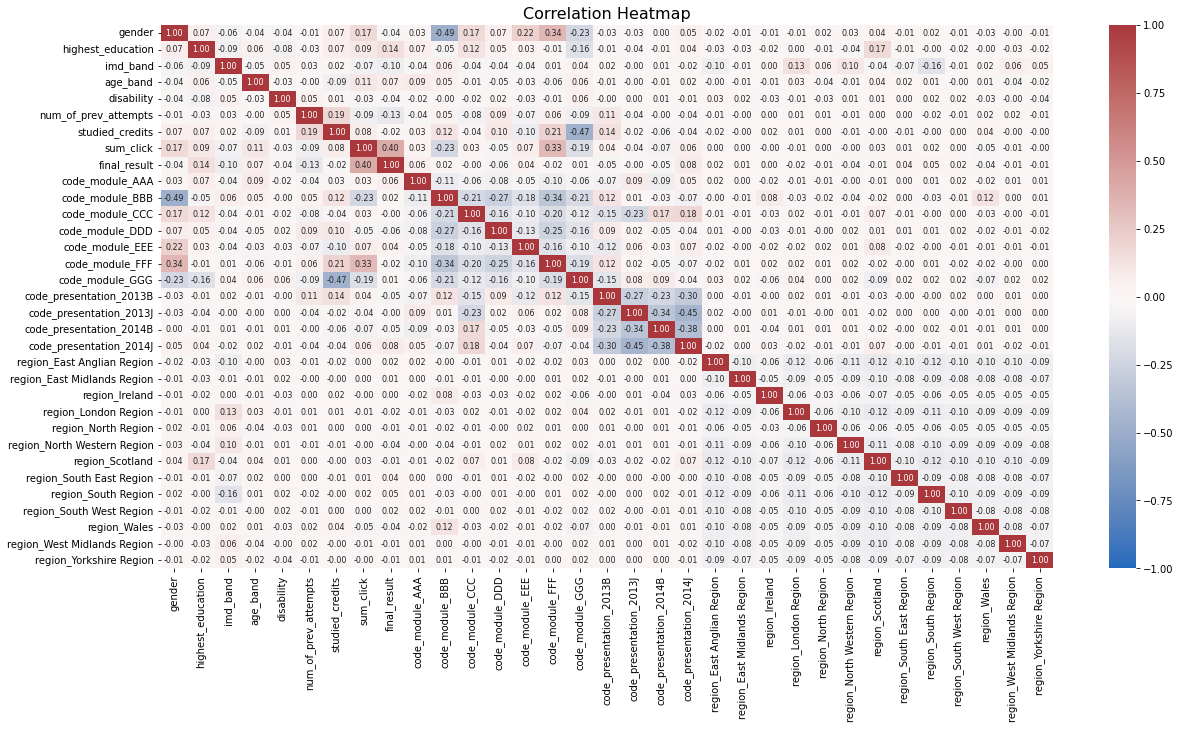

In [71]:
# Correlation matrix

corr_matrix = data_num_scaled.corr(method="kendall")

plt.figure(figsize=(20, 10), facecolor="white")
heatmap = sns.heatmap(
    corr_matrix,  
    vmin=-1, vmax=1,  # because correlation coefficients
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )
heatmap.set_title('Correlation Heatmap', fontsize=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

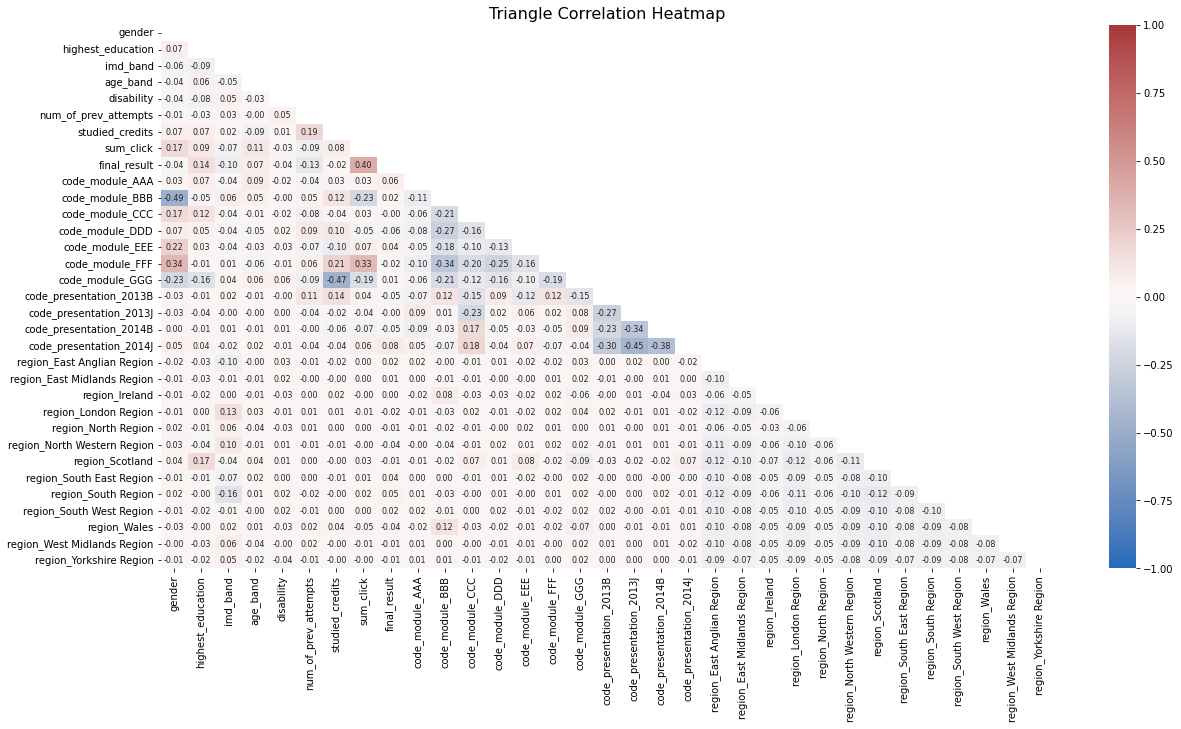

In [72]:
# Triangle correlation matrix

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 10), facecolor="white")
heatmap = sns.heatmap(
    corr_matrix,  
    mask=mask,
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )
heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

### Selected features

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

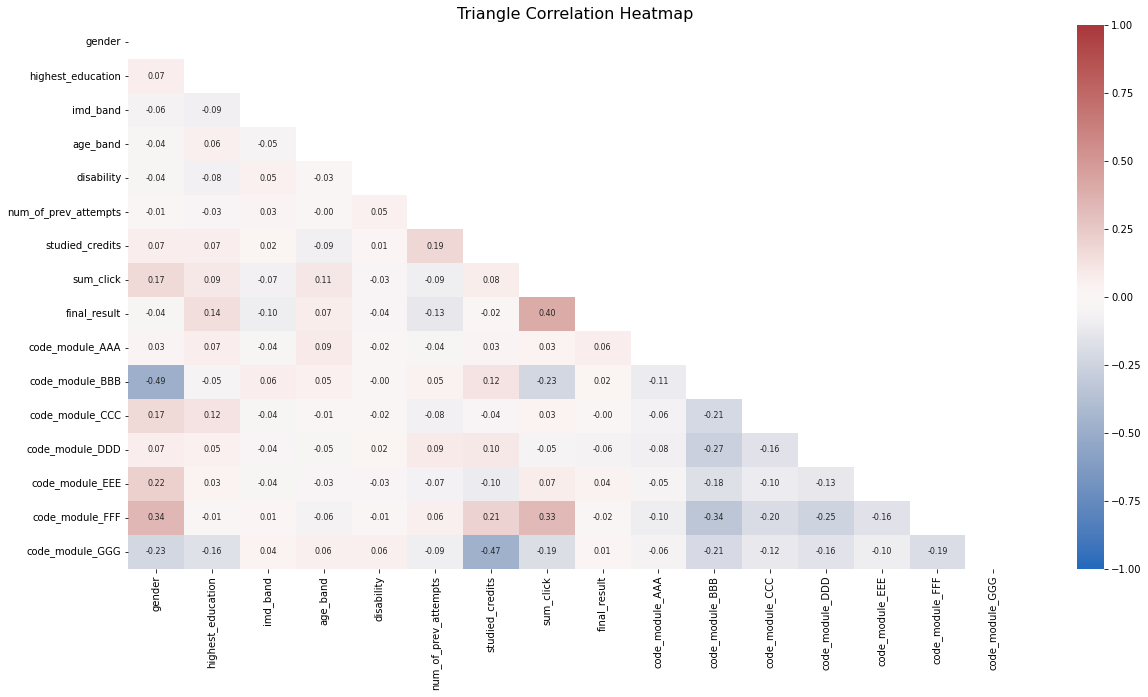

In [73]:
# code_representation and region removed

col = list()
for column in data_num_scaled.columns:
    if "code_presentation" in column:
        col.append(column)
data_num_scaled_without_codepresentation = data_num_scaled.drop(columns=col)

col = list()
for column in data_num_scaled_without_codepresentation.columns:
    if "region" in column:
        col.append(column)
data_num_scaled_without_codepresentation_region = data_num_scaled_without_codepresentation.drop(columns=col)

mask = np.triu(np.ones_like(data_num_scaled_without_codepresentation_region.corr(method="kendall"), dtype=bool))

plt.figure(figsize=(20, 10), facecolor="white")
heatmap = sns.heatmap(
    data_num_scaled_without_codepresentation_region.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )
heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

## Mutual information (univariate analysis)

In [74]:
def make_mi_scores(X, y, label):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI scores " + label, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [75]:
# MI by final_result
X_mi_finalresult = data_num_scaled_without_codepresentation_region.drop(columns=["final_result"])
y_mi_finalresult = data_num_scaled_without_codepresentation_region["final_result"].astype(int)
mi_scores_finalresult = make_mi_scores(X_mi_finalresult, y_mi_finalresult, "final_result")

# MI by gender
X_mi_gender = data_num_scaled_without_codepresentation_region.drop(columns=["final_result", "gender"])
y_mi_gender = data_num_scaled_without_codepresentation_region["gender"].astype(int)
mi_scores_gender = make_mi_scores(X_mi_gender, y_mi_gender, "gender")

# MI by imd_band
X_mi_imdband = data_num_scaled_without_codepresentation_region.drop(columns=["final_result", "imd_band"])
y_mi_imdband = data_num_scaled_without_codepresentation_region["imd_band"].astype(int)
mi_scores_imdband = make_mi_scores(X_mi_imdband, y_mi_imdband, "imd_band")

# MI by disability
X_mi_disability = data_num_scaled_without_codepresentation_region.drop(columns=["final_result", "disability"])
y_mi_disability = data_num_scaled_without_codepresentation_region["disability"].astype(int)
mi_scores_disability = make_mi_scores(X_mi_imdband, y_mi_imdband, "disability")

### Sensitive attributes

In [76]:
mi_scores_gender = mi_scores_gender.rename("gender", inplace=False)
mi_scores_gender = mi_scores_gender.rename(index={"imd_band": "poverty", "code_module_AAA": "course_AAA",
                        "code_module_BBB": "course_BBB", "code_module_CCC": "course_CCC",
                        "code_module_DDD": "course_DDD", "code_module_EEE": "course_EEE",
                        "code_module_FFF": "course_FFF", "code_module_GGG": "course_GGG",
                        "age_band": "age"}, inplace=False)

mi_scores_imdband = mi_scores_imdband.rename("poverty", inplace=False)
mi_scores_imdband = mi_scores_imdband.rename(index={"imd_band": "poverty", "code_module_AAA": "course_AAA",
                        "code_module_BBB": "course_BBB", "code_module_CCC": "course_CCC",
                        "code_module_DDD": "course_DDD", "code_module_EEE": "course_EEE",
                        "code_module_FFF": "course_FFF", "code_module_GGG": "course_GGG",
                        "age_band": "age"}, inplace=False)

mi_scores_disability = mi_scores_disability.rename("disability", inplace=False)
mi_scores_disability = mi_scores_disability.rename(index={"imd_band": "poverty", "code_module_AAA": "course_AAA",
                        "code_module_BBB": "course_BBB", "code_module_CCC": "course_CCC",
                        "code_module_DDD": "course_DDD", "code_module_EEE": "course_EEE",
                        "code_module_FFF": "course_FFF", "code_module_GGG": "course_GGG",
                        "age_band": "age"}, inplace=False)

Text(0.5, 0, 'MI scores')

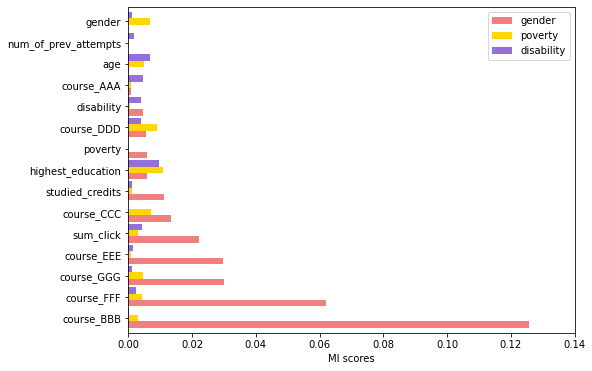

In [77]:
df_mi1 = pd.DataFrame([ 
                       mi_scores_gender, 
                       mi_scores_imdband,
                       mi_scores_disability]).T

ax0 = df_mi1.plot.barh(
                      color={
                      "gender": "lightcoral",
                      "poverty": "gold",
                      "disability": "mediumpurple"}, 
                      xlim=(0, 0.14), figsize=(8, 6), width=.9, 
                      stacked=False, align='center', linewidth=1)
ax0.set_xlabel("MI scores") 

Text(0.5, 0, 'MI scores')

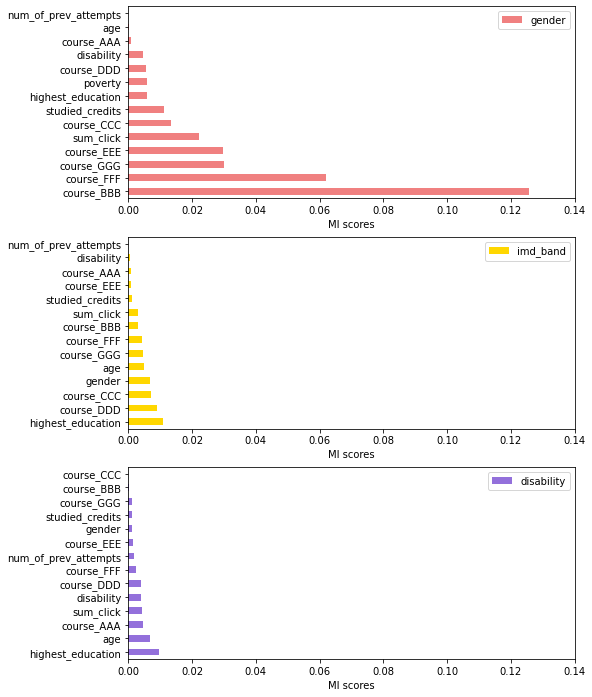

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax1 = mi_scores_gender.plot(ax=axes[0], kind="barh", color="lightcoral", label="gender")
ax1.set_xlim(0, 0.14)
ax1.legend()
ax1.set_xlabel("MI scores") 
ax2 = mi_scores_imdband.plot(ax=axes[1], kind="barh", color="gold", label="imd_band")
ax2.set_xlim(0, 0.14)
ax2.legend()
ax2.set_xlabel("MI scores") 
ax3 = mi_scores_disability.plot(ax=axes[2], kind="barh", color="mediumpurple", label="disability")
ax3.set_xlim(0, 0.14)
ax3.legend()
ax3.set_xlabel("MI scores") 


### Target variable

In [79]:
mi_scores_finalresult = mi_scores_finalresult.rename("final_result", inplace=False)
mi_scores_finalresult = mi_scores_finalresult.rename(index={"imd_band": "poverty", "code_module_AAA": "course_AAA",
                        "code_module_BBB": "course_BBB", "code_module_CCC": "course_CCC",
                        "code_module_DDD": "course_DDD", "code_module_EEE": "course_EEE",
                        "code_module_FFF": "course_FFF", "code_module_GGG": "course_GGG",
                        "age_band": "age"}, inplace=False)

<AxesSubplot:>

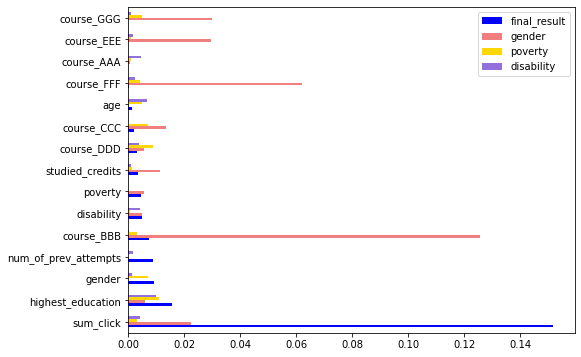

In [80]:
pd.DataFrame([mi_scores_finalresult, 
              mi_scores_gender, 
              mi_scores_imdband,
              mi_scores_disability]).T.plot.barh(
                color={"final_result": "blue",
                "gender": "lightcoral",
                "poverty": "gold",
                "disability": "mediumpurple"}, figsize=(8, 6))

Text(0.5, 0, 'MI scores')

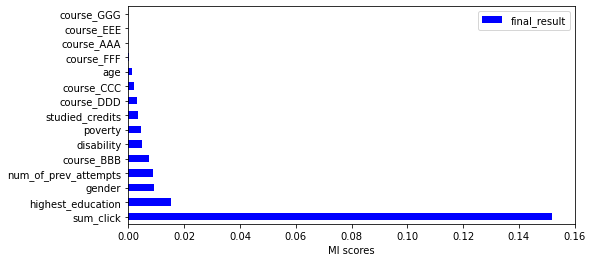

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax0 = mi_scores_finalresult.plot(kind="barh", color="blue", label="final_result")
ax0.set_xlim(0, 0.16)
ax0.legend()
ax0.set_xlabel("MI scores") 

## (Optional) Pairwise relationships and other correlation plots

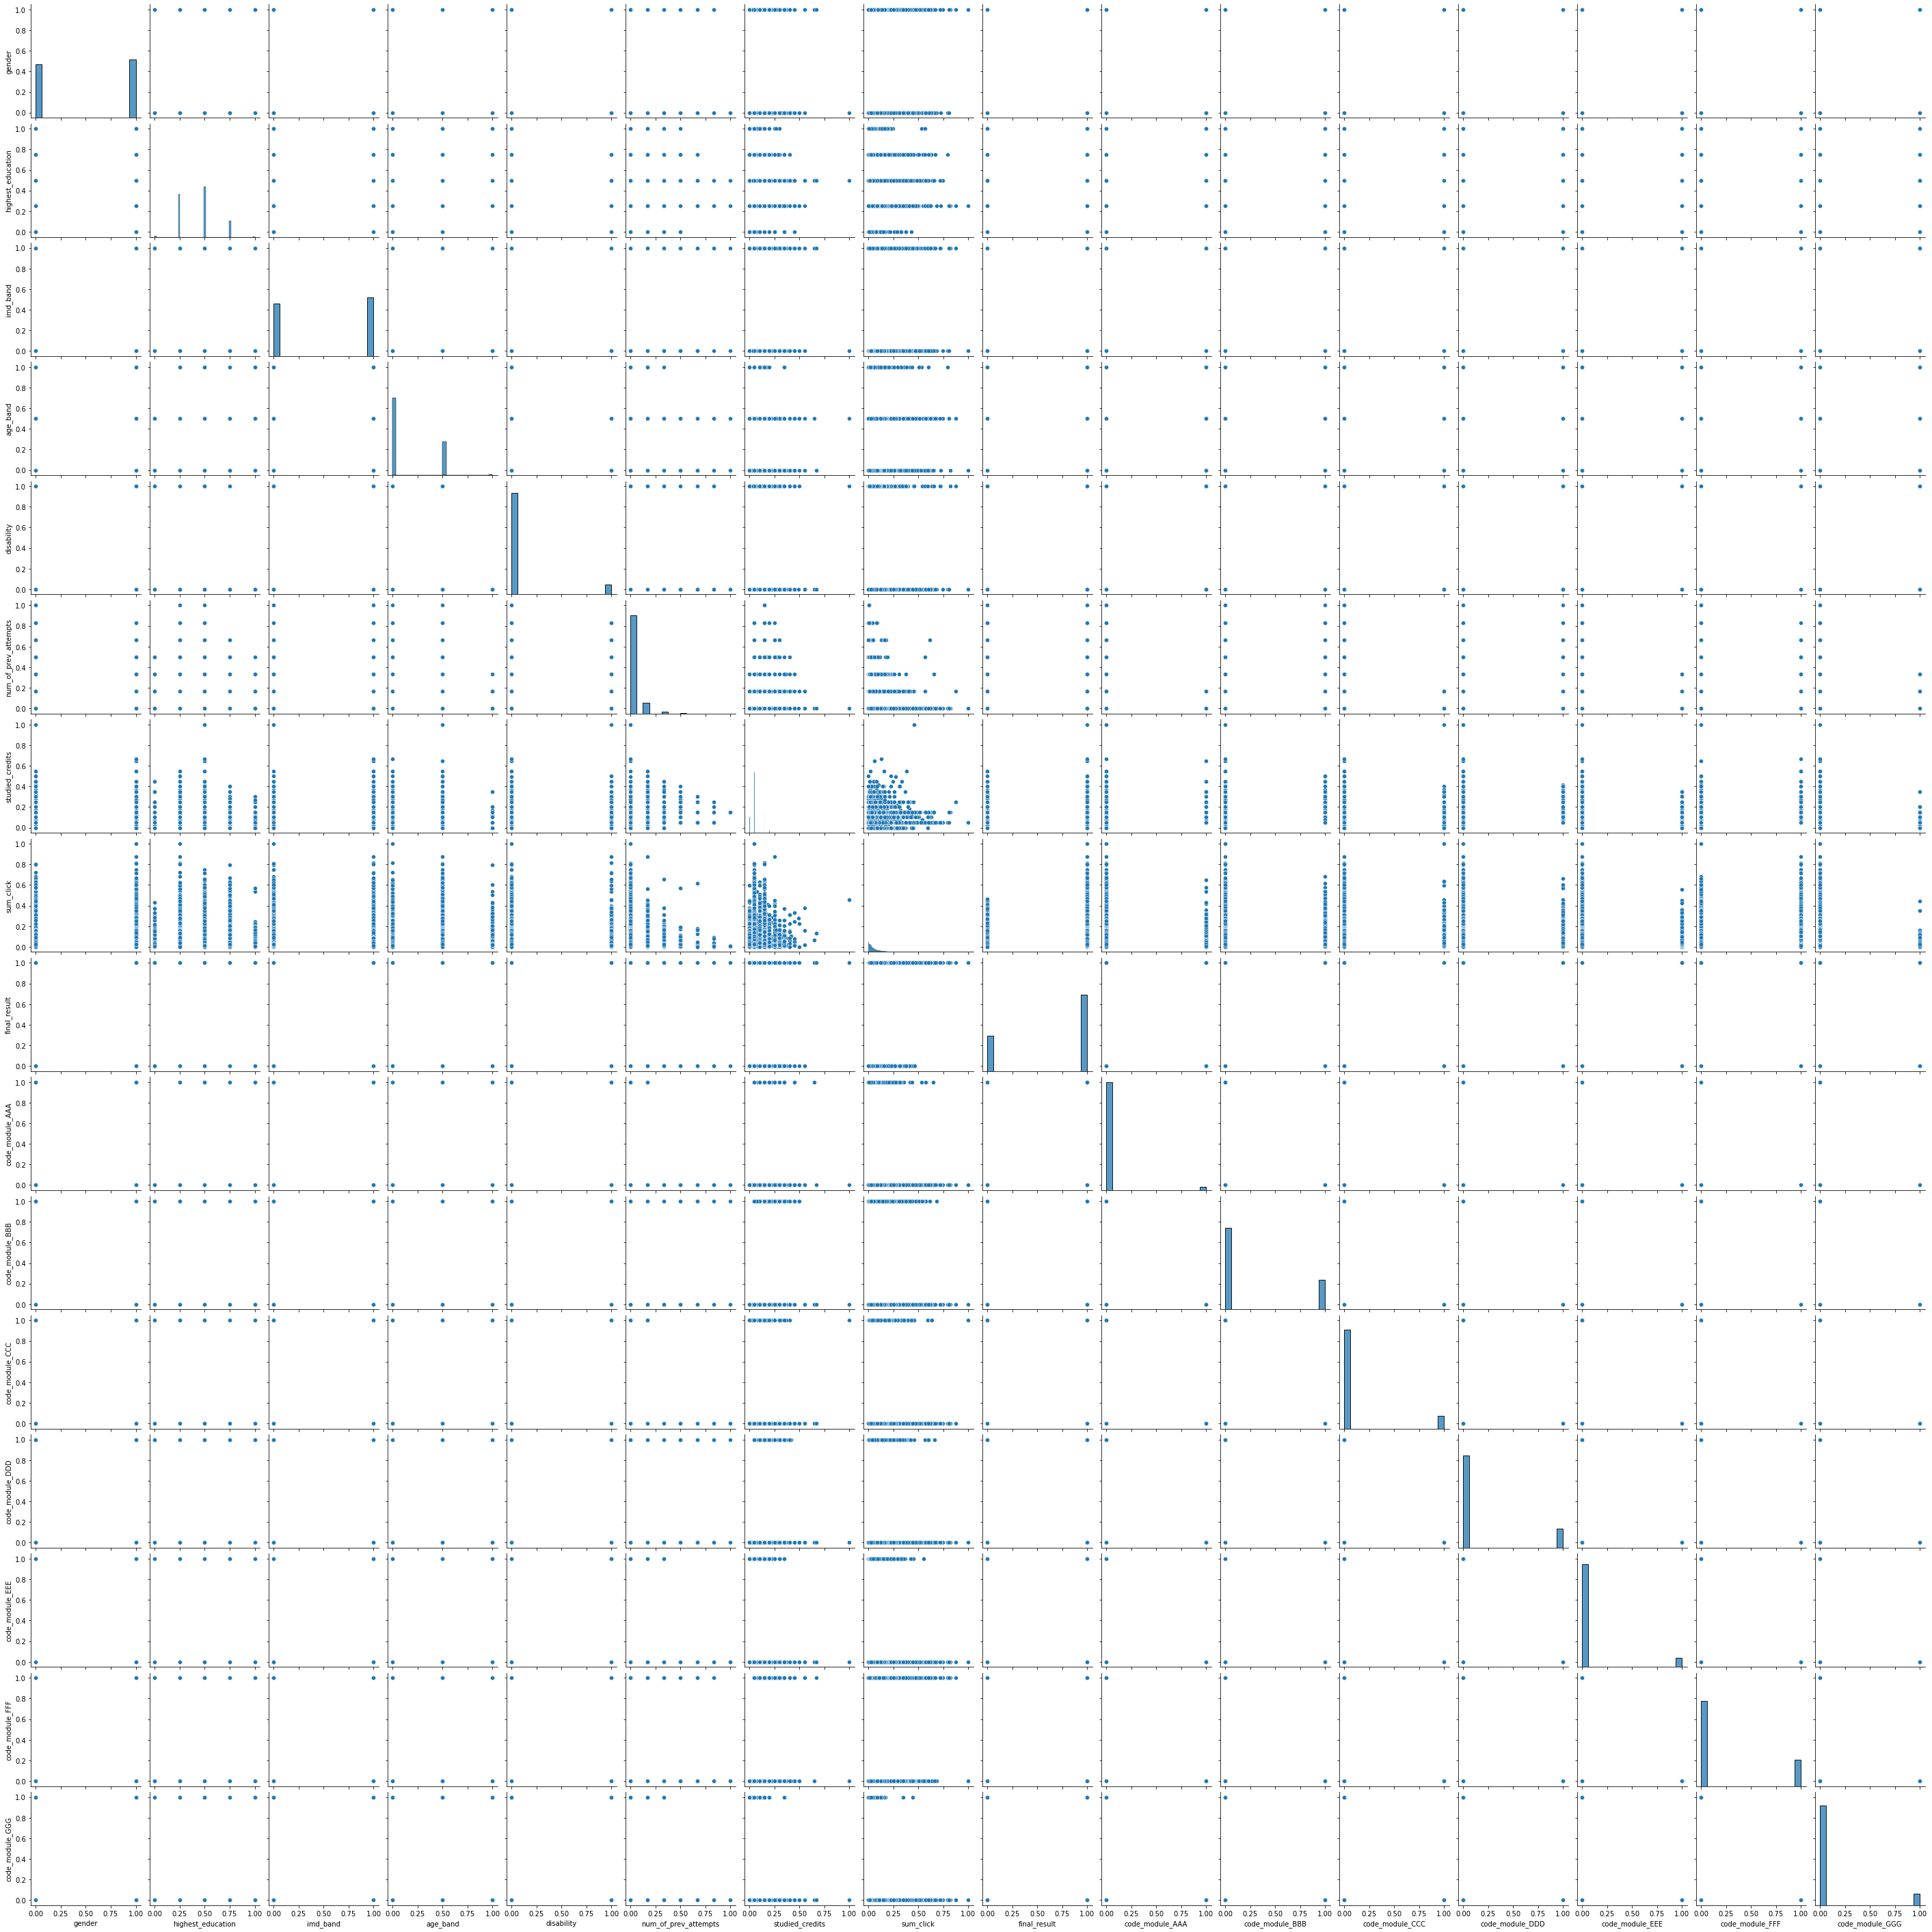

In [82]:
sns.pairplot(data_num_scaled_without_codepresentation_region)

<Figure size 360x360 with 0 Axes>

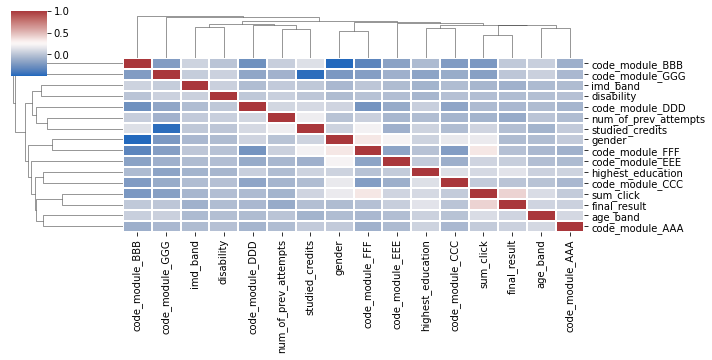

In [83]:
plt.figure(figsize=(5,5))
sns.clustermap(data_num_scaled_without_codepresentation_region.corr(method="kendall"), 
           cmap="vlag",
           linewidths=0.1,
           figsize=(10,5))

<AxesSubplot:>

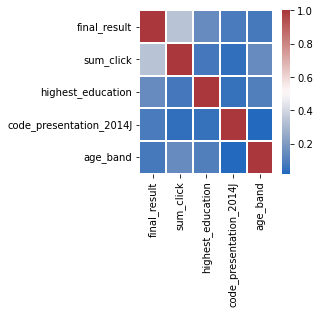

In [84]:
k = 5 #number of variables for heatmap
corrmat = data_num_scaled.corr(method="kendall")
cols = corrmat.nlargest(k, 'final_result')['final_result'].index
cm = np.corrcoef(data_num_scaled[cols].values.T)
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, ax=ax, cmap="vlag", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)